In [173]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/kepler_data.csv",skiprows = [i for i in range(52)])

In [174]:
df

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

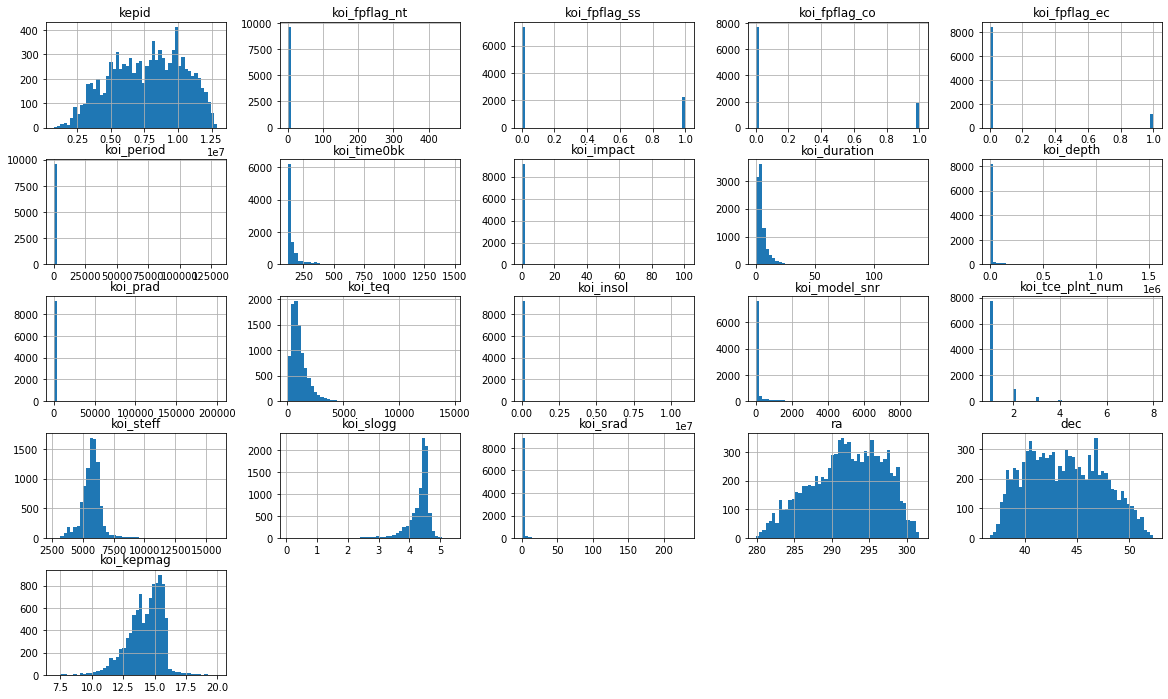

In [176]:
# There are a lot of columns with NaN values.
# Drop all columns that we do not need
drop_list = ["kepler_name","kepoi_name","koi_score"]
for col in df:
    if 'err' in col:
        drop_list.append(col)
df = df.drop(drop_list, axis=1)

# Plotting Histograms
df.hist(bins=50, figsize=(20,12))
plt.show()

In [177]:
df.koi_disposition.value_counts()

FALSE POSITIVE    4840
CANDIDATE         2366
CONFIRMED         2358
Name: koi_disposition, dtype: int64

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Getting all categorical values in our dataframe
import numpy as np
df1 = df.drop("koi_disposition", axis = 1)
cat_attribs = []
for label in df1:
    if (df1[label].dtype != np.number) and (df1[label].dtype != "int64"):
        cat_attribs += [label]
        
# Getting numerical values  
num_attribs = df.select_dtypes(include=['int64', 'float64']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=float("NaN"),strategy="mean")),
    ('scaler', StandardScaler()),])
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if sys.path[0] == '':


In [179]:
# Splitting the training and testing set + Training our MLA

from sklearn.model_selection import train_test_split
df.koi_disposition = (df.koi_disposition == "CONFIRMED")   # since it is a binary classifier

x_train, x_test, y_train, y_test = train_test_split(df.drop("koi_disposition", axis=1),df.koi_disposition, test_size=0.2, random_state=42)
x_train

,kepid,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
8117,7870250,FALSE POSITIVE,1,0,1,1,0.580725,131.729560,0.2920,1.8200,...,5418.89,16.9,1.0,q1_q17_dr25_tce,5989.0,4.492,0.933,282.15744,43.689152,14.569
5245,11651712,CANDIDATE,0,0,0,0,14.532605,140.468500,0.1120,2.4212,...,73.37,29.0,1.0,q1_q17_dr25_tce,6003.0,4.507,0.932,285.71191,49.706661,13.785
5865,4945877,FALSE POSITIVE,0,0,1,0,1.339670,132.167860,0.6020,1.8950,...,33385.02,21.7,1.0,q1_q17_dr25_tce,8867.0,3.988,2.245,297.19012,40.027969,10.455
4050,6289344,FALSE POSITIVE,0,1,1,0,160.412202,262.400220,0.9030,4.9200,...,1.26,24.4,1.0,q1_q17_dr25_tce,5269.0,4.620,0.727,293.20773,41.698582,15.407
5130,9843517,CANDIDATE,0,0,0,0,11.937835,133.261200,0.0360,4.6520,...,47.91,9.6,1.0,q1_q17_dr25_tce,5469.0,4.611,0.738,296.65256,46.618809,15.954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5303557,FALSE POSITIVE,0,0,1,0,2.399082,133.064250,1.2760,4.3840,...,810.78,89.9,1.0,q1_q17_dr25_tce,5780.0,4.438,1.000,298.57697,40.490395,16.494
5191,8636333,CANDIDATE,0,0,0,0,82.175197,197.201870,0.0150,8.6640,...,8.92,20.8,1.0,q1_q17_dr25_tce,6247.0,4.489,0.954,295.94827,44.753120,15.292
5390,6543683,FALSE POSITIVE,0,1,1,1,1.195515,132.303851,1.2810,5.0834,...,3469.70,309.1,1.0,q1_q17_dr25_tce,6040.0,4.271,1.155,297.54337,41.947979,13.998
860,8935810,CANDIDATE,0,0,0,0,6.230335,181.295660,0.8080,1.6493,...,138.33,31.6,1.0,q1_q17_dr25_tce,5477.0,4.557,0.865,284.20966,45.258080,15.977


In [180]:
x_train_prepared = full_pipeline.fit_transform(x_train)

In [181]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train_prepared,y_train)

SGDClassifier(random_state=42)

In [182]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, accuracy_score

y_scores = cross_val_predict(sgd_clf, x_train_prepared, y_train, cv=3, method="decision_function")

fpr1, tpr1, thresholds1 = roc_curve(y_train, y_scores)

x_test_prepared = full_pipeline.fit_transform(x_test)
y_test_pred = sgd_clf.predict(x_test_prepared)

# FINE-TUNNING THE MLA
from sklearn.model_selection import GridSearchCV

param_grid = [
{'loss': ["hinge","log","perceptron"], 'alpha': [0.1,0.01,1e-3, 1e-6, 1e-9]},
]
sgd_2 = SGDClassifier(random_state=42)
grid_search = GridSearchCV(sgd_2, param_grid, cv=5,return_train_score=True)
grid_search.fit(x_train_prepared, y_train)
grid_search.best_estimator_

SGDClassifier(alpha=0.1, loss='perceptron', random_state=42)

In [183]:
y_test_pred_sgd_2 = grid_search.predict(x_test_prepared)
precision_score(y_test, y_test_pred_sgd_2,average='weighted')

0.7408039146781437

In [184]:
recall_score(y_test, y_test_pred_sgd_2,average='weighted') 

0.7569262937794041

In [185]:
f1_score(y_test, y_test_pred_sgd_2,average='weighted')

0.680354658157873

In [186]:
accuracy_score(y_test, y_test_pred_sgd_2)

0.7569262937794041

In [187]:
y_scores = cross_val_predict(grid_search, x_train_prepared, y_train, cv=5, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

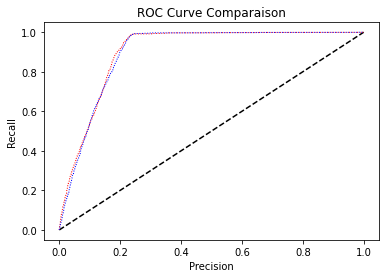

In [188]:
# comparing the old roc with the new one.
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.title("ROC Curve Comparaison")
plt.ylabel("Recall")
plt.xlabel("Precision")
plt.plot(fpr, tpr,':', linewidth=1, label=label, c='r')
plt.plot(fpr1, tpr1,':', linewidth=1, label=label, c='b')
plt.show()
# Basically the same ROC Curve